**Seeding for reproducibility**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [5]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [6]:
!pip install kaggle

In [7]:
kaggle_credentails = json.load(open("kaggle.json"))

In [8]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [11]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset
# !kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:55<00:00, 23.8MB/s]
100% 2.04G/2.04G [01:55<00:00, 19.0MB/s]


In [12]:
!ls

drive  kaggle.json  plantdisease.zip  plantvillage-dataset.zip	sample_data


In [13]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['validation', 'segmented', 'color', 'test', 'grayscale', 'train']
38
['Pepper,_bell___healthy', 'Grape___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Cherry_(including_sour)___Powdery_mildew']
38
['Pepper,_bell___healthy', 'Grape___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Cherry_(including_sour)___Powdery_mildew']
38
['Pepper,_bell___healthy', 'Grape___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Cherry_(including_sour)___Powdery_mildew']


**Number of Classes = 38**

In [15]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['b57b3a18-da12-4b34-b0a7-6b2dfe58871f___Mt.N.V_HL 6065.JPG', '61c91bc6-ac97-4427-9691-f2015b1c0453___Mt.N.V_HL 9076.JPG', '4b266fb8-a762-4073-a9e2-25a3861115c4___Mt.N.V_HL 6152.JPG', '56eda055-bb22-4adf-b829-549c03804b9d___Mt.N.V_HL 6155.JPG', '85c128f1-a36e-4345-835d-1668fe2d7467___Mt.N.V_HL 9018.JPG']


**Data Preprocessing**

In [16]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


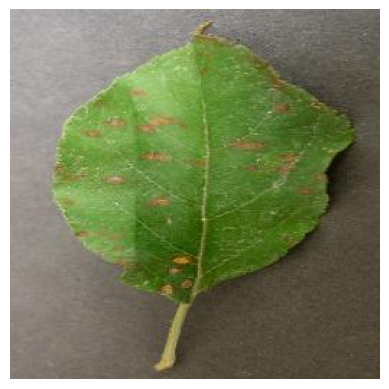

In [17]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [18]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [19]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [10]:
import os
import shutil
import random

# Define the base directory containing the dataset
base_dir = '/content/plantvillage dataset'
source_dir = os.path.join(base_dir, 'color')

# Define the directories for training, validation, and testing
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the percentage splits
train_split = 0.6
val_split = 0.2
test_split = 0.2

# List all categories
categories = os.listdir(source_dir)

# Loop through each category folder
for category in categories:
    category_path = os.path.join(source_dir, category)
    files = os.listdir(category_path)
    num_files = len(files)
    random.shuffle(files)

    # Split the files into train, validation, and test sets
    train_end = int(num_files * train_split)
    val_end = int(num_files * (train_split + val_split))

    # Move files to the respective directories
    for i, file_name in enumerate(files):
        if i < train_end:
            dest_dir = os.path.join(train_dir, category)
        elif train_end <= i < val_end:
            dest_dir = os.path.join(val_dir, category)
        else:
            dest_dir = os.path.join(test_dir, category)

        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(os.path.join(category_path, file_name), dest_dir)


# Now that images are copied, let's create the generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generators
img_size = 224  # Define the image size
batch_size = 32  # Define the batch size

data_gen = ImageDataGenerator(rescale=1./255)

# Train Generator
train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Test Generator
test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 32571 images belonging to 38 classes.
Found 10858 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


**Convolutional Neural Network**

In [22]:
from keras import regularizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,537,190 (169.90 MB)

 Trainable params: 44,537,190 (169.90 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [24]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1017/1017 ━━━━━━━━━━━━━━━━━━━━ 107s 95ms/step - accuracy: 0.3347 - loss: 3.0730 - val_accuracy: 0.7245 - val_loss: 1.5056
Epoch 2/5
   1/1017 ━━━━━━━━━━━━━━━━━━━━ 1:13 72ms/step - accuracy: 0.5625 - loss: 2.0987

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1017/1017 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5625 - loss: 2.0987 - val_accuracy: 0.7000 - val_loss: 1.7051
Epoch 3/5
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.6524 - loss: 1.7193 - val_accuracy: 0.8022 - val_loss: 1.1917
Epoch 4/5
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.8125 - loss: 1.2157 - val_accuracy: 0.9000 - val_loss: 1.0570
Epoch 5/5
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 147s 87ms/step - accuracy: 0.7165 - loss: 1.5056 - val_accuracy: 0.8225 - val_loss: 1.1533


**Model Evaluation**

In [25]:
# Model Evaluation
print("Evaluating model...")
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.8152 - loss: 1.1646
Test Accuracy: 81.60%


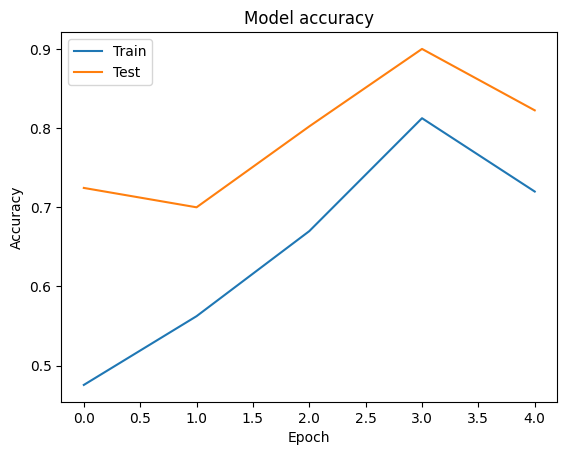

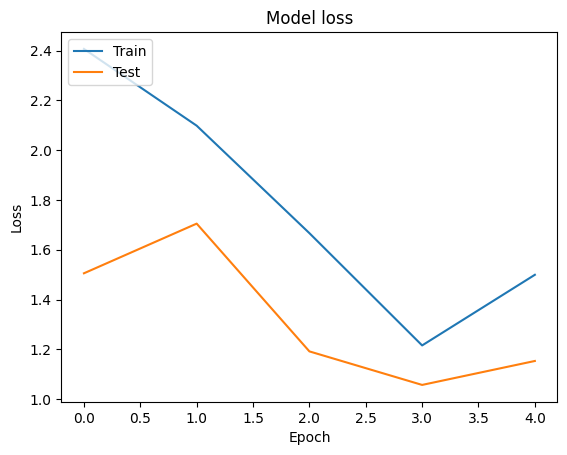

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('plant_disease_prediction_model_simple_cnn.h5')


In [31]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Define data generators with augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'plantvillage dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    'plantvillage dataset/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define callbacks for model checkpointing and early stopping
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping]
)

model.save('plant_disease_prediction_model_vgg.h5')



Found 32571 images belonging to 38 classes.
Found 10858 images belonging to 38 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.3964 - loss: 2.4748
Epoch 1: val_accuracy improved from -inf to 0.82004, saving model to best_model.keras
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 522s 495ms/step - accuracy: 0.3965 - loss: 2.4741 - val_accuracy: 0.8200 - val_loss: 0.5934
Epoch 2/5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.6796 - loss: 1.1055
Epoch 2: val_accuracy improved from 0.82004 to 0.89501, saving model to best_model.keras
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 539s 526ms/step - accuracy: 0.6796 - loss: 1.1055 - val_accuracy: 0.8950 - val_loss: 0.3533
Epoch 3/5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.7472 - loss: 0.8465
Epoch 3: val_accuracy did not improve from 0.89501
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 511s 500ms/step - accuracy: 0.7472 - loss: 0.8465 - val_accuracy: 0.8884 - val_loss: 0.3416
Epoch 4/5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.7741 - loss: 0.7352
Epoch 4: val_accuracy improved from 0.89501 to 0.91380, sav

In [32]:
# Model Evaluation
print("Evaluating model...")
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 47s 137ms/step - accuracy: 0.9220 - loss: 0.2376
Test Accuracy: 91.92%


In [ ]:
model.save('plant_disease_prediction_model_vgg.keras')

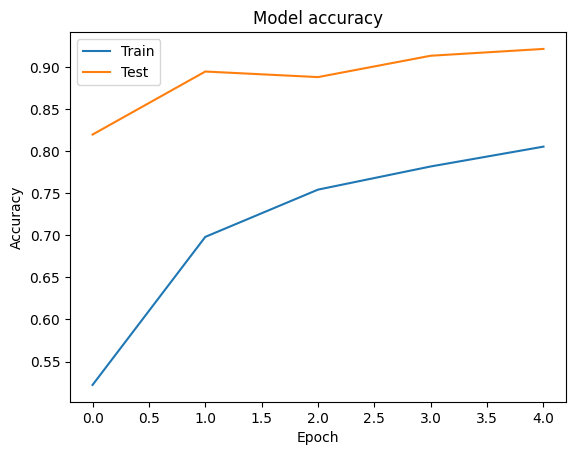

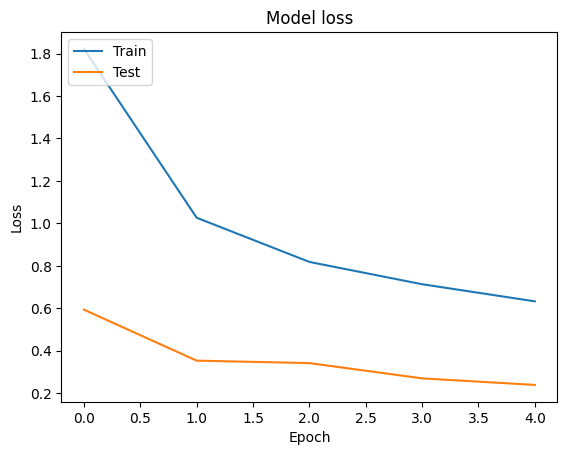

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [1]:
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained DenseNet121 model without the top classification layer
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model_densenet.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model_densenet = Sequential([
    base_model_densenet,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

# Compile the model
model_densenet.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


# Define data generators with augmentation for training and validation
train_datagen_densenet = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen_densenet = ImageDataGenerator(rescale=1./255)

train_generator_densenet = train_datagen_densenet.flow_from_directory(
    'plantvillage dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator_densenet = val_datagen_densenet.flow_from_directory(
    'plantvillage dataset/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define callbacks for model checkpointing and early stopping
checkpoint_densenet = ModelCheckpoint('best_model_densenet.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping_densenet = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history_densenet = model_densenet.fit(
    train_generator_densenet,
    epochs=5,
    validation_data=validation_generator_densenet,
    callbacks=[checkpoint_densenet, early_stopping_densenet]
)



Found 32571 images belonging to 38 classes.
Found 10858 images belonging to 38 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.5291 - loss: 1.8852
Epoch 1: val_accuracy improved from -inf to 0.91453, saving model to best_model_densenet.keras
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 557s 510ms/step - accuracy: 0.5292 - loss: 1.8846 - val_accuracy: 0.9145 - val_loss: 0.2776
Epoch 2/5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.8032 - loss: 0.6745
Epoch 2: val_accuracy improved from 0.91453 to 0.94014, saving model to best_model_densenet.keras
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 484s 453ms/step - accuracy: 0.8032 - loss: 0.6745 - val_accuracy: 0.9401 - val_loss: 0.1904
Epoch 3/5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.8513 - loss: 0.5023
Epoch 3: val_accuracy improved from 0.94014 to 0.94603, saving model to best_model_densenet.keras
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 503s 453ms/step - accuracy: 0.8513 - loss: 0.5023 - val_accuracy: 0.9460 - val_loss: 0.1723
Epoch 4/5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.8734 - loss: 0

In [13]:
# test_loss, test_accuracy = model_densenet.evaluate(test_generator, steps=test_generator.samples // batch_size)
# print(f"Test Loss: {test_loss:.4f}")
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Model Evaluation
print("Evaluating model...")
test_loss, test_accuracy = model_densenet.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.9543 - loss: 0.1298
Test Accuracy: 94.99%


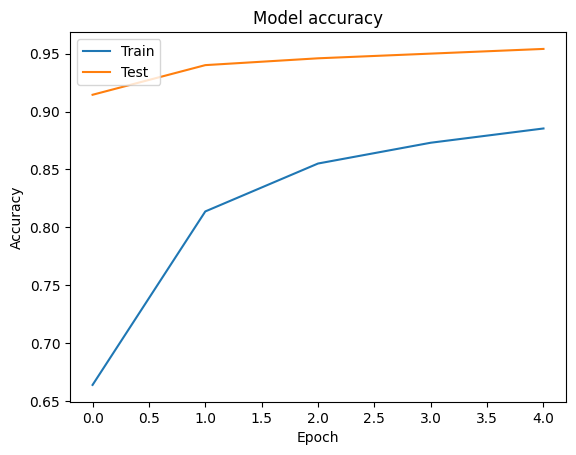

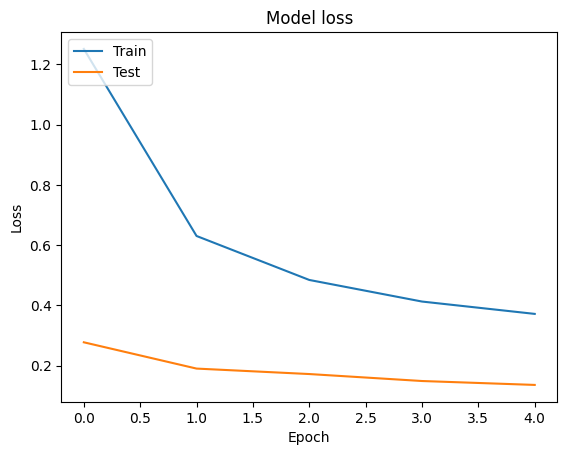

In [14]:
# Plot training & validation accuracy values
plt.plot(history_densenet.history['accuracy'])
plt.plot(history_densenet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_densenet.history['loss'])
plt.plot(history_densenet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# model_densenet.save('plant_disease_prediction_model_densenet.h5')
model_densenet.save('plant_disease_prediction_model_densenet.keras')


**Building a Predictive System**

In [15]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [16]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [17]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [19]:
# Example Usage
image_path = '/content/plantvillage dataset/test/Corn_(maize)___healthy/b3ff7fcd-955e-4a4d-9278-9642ac737f73___R.S_HL 0638 copy 2.jpg'
predicted_class_name = predict_image_class(model_densenet, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Predicted Class Name: Corn_(maize)___healthy
